Tech Challenge – Fase 1

Pós Tech IA para Devs (FIAP + Alura)

Turma: Segurança Pública

Tema: Classificação de Câncer de Mama (Wisconsin)

Alunos: 
  - Wilson Silva Cunha [rm370006]
  - Daniel da Silva Neto [rm369995]
  - Ismael de Freitas Pinho [rm30127]
  - Francisco de Assis Soares de Souza [rm370009]

### Importação das bibliotecas necessárias

Importação das bibliotecas principais para manipulação de dados, análise e visualização.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Carregamento dos dados

Carrega o dataset de câncer de mama Wisconsin e exibe as primeiras linhas para verificação inicial dos dados.

In [2]:
df = pd.read_csv("../data/data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### Informações do dataset

Exibe informações sobre a estrutura do dataset, incluindo tipos de dados, número de colunas e valores não nulos.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

### Limpeza de dados

Remove a coluna "Unnamed: 32" que o contéudo é nulo

In [4]:
df = df.drop(columns=["Unnamed: 32"])

### Verificação da dimensão do dataset

Visualiza as dimensões do dataset após a remoção da coluna desnecessária.

In [5]:
df.shape

(569, 32)

### Visualização da distribuição do diagnóstico

Cria um gráfico de barras mostrando a distribuição dos casos benignos (B) e malignos (M) no dataset.

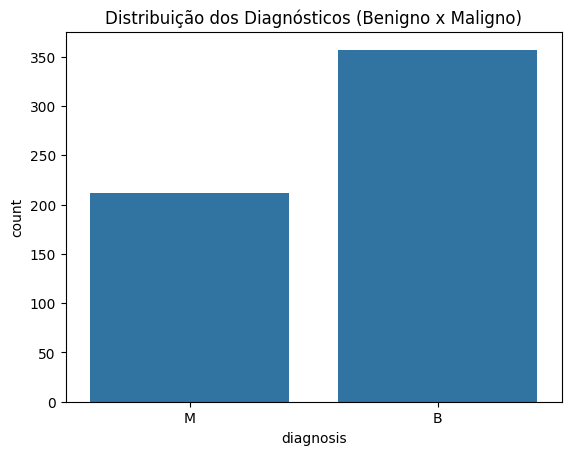

In [6]:
sns.countplot(x="diagnosis", data=df)
plt.title("Distribuição dos Diagnósticos (Benigno x Maligno)")
plt.show()


### Codificação da variável target

Converte os valores da coluna "diagnosis" de categóricos (B/M) para numéricos (0/1), onde:
- B (Benigno) = 0
- M (Maligno) = 1

Depois exibe a contagem de cada classe para verificar a distribuição.

In [7]:
df["diagnosis"] = df["diagnosis"].map({"B": 0, "M": 1})
df["diagnosis"].value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

### Separação de features e target

Separa o dataset em variáveis independentes (X) - todas as características numéricas - e variável dependente (y) - o diagnóstico. Remove as colunas "id" e "diagnosis" de X, mantendo apenas as features relevantes para o modelo.

In [8]:
X = df.drop(columns=["id", "diagnosis"])
y = df["diagnosis"]

X.shape, y.shape


((569, 30), (569,))

### Divisão em conjunto de treino e teste

Divide o dataset em conjuntos de treino e teste usando 70% dos dados para treino e 30% para teste. Utiliza random_state=42 para garantir reprodutibilidade dos resultados.

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3, 
    random_state=42
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((398, 30), (171, 30), (398,), (171,))

### Teste de treinamento sem normalização (versão inicial)

Treina um modelo de Regressão Logística usando os dados originais sem normalização, apenas para comparação. Posteriormente, será utilizado o modelo treinado com dados normalizados que geralmente apresenta melhor desempenho.

In [10]:
from sklearn.linear_model import LogisticRegression

modelo = LogisticRegression(max_iter=3000)

modelo.fit(X_train, y_train)


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

### Normalização dos dados

Aplica o StandardScaler para normalizar as features, transformando-as para ter média zero e desvio padrão unitário. Isso é importante para algoritmos de machine learning que são sensíveis à escala dos dados, como a Regressão Logística.

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### Treinamento do modelo

Cria e treina um modelo de Regressão Logística usando os dados normalizados. A Regressão Logística é um algoritmo de classificação binária adequado para este problema de diagnóstico de câncer de mama (benigno vs maligno).


In [12]:
modelo = LogisticRegression(max_iter=1000)

modelo.fit(X_train_scaled, y_train)


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

### Avaliação da acurácia do modelo

Faz previsões no conjunto de teste e calcula a acurácia do modelo, que representa a proporção de previsões corretas em relação ao total de amostras.

In [13]:
from sklearn.metrics import accuracy_score

y_pred = modelo.predict(X_test_scaled)

accuracy_score(y_test, y_pred)

0.9824561403508771

### Matriz de confusão

Gera a matriz de confusão para visualizar os acertos e erros do modelo. Mostra quantos casos foram classificados corretamente como benignos (0) e malignos (1), e quantos foram classificados incorretamente.

In [14]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred)
cm

array([[106,   2],
       [  1,  62]])

### Relatório de classificação

Exibe um relatório detalhado com as métricas de classificação: precisão, recall (sensibilidade), F1-score e suporte para cada classe. Isso permite uma avaliação mais completa do desempenho do modelo além da acurácia.

In [15]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.99      0.98      0.99       108
           1       0.97      0.98      0.98        63

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171




## Incremento de Análise Exploratória de Dados (EDA)

Esta seção foi incrementada com base em boas práticas de EDA e na análise apresentada no artigo:
*Exploratory Data Analysis – Breast Cancer Wisconsin Diagnostic Dataset*.



### Verificação de valores ausentes e duplicados


In [16]:

# Verificação de valores ausentes
df.isnull().sum().sort_values(ascending=False)

# Verificação de duplicados
df.duplicated().sum()


np.int64(0)


### Distribuição da variável alvo


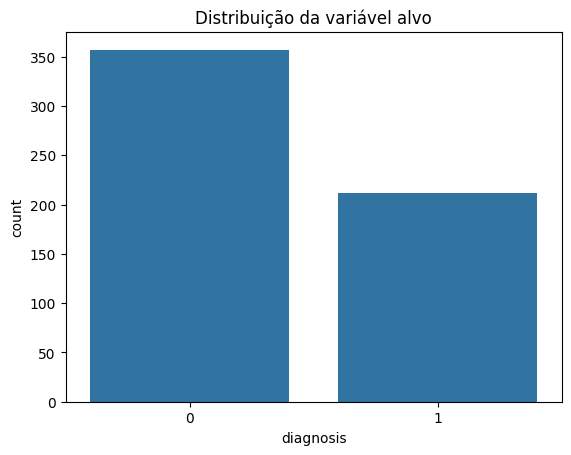

In [17]:

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='diagnosis', data=df)
plt.title('Distribuição da variável alvo')
plt.show()



### Estatísticas descritivas por classe


In [18]:

df.groupby('diagnosis').describe().T


diagnosis                                 0             1
id                      count  3.570000e+02  2.120000e+02
                        mean   2.654382e+07  3.681805e+07
                        std    1.167397e+08  1.378965e+08
                        min    8.913000e+03  8.670000e+03
                        25%    8.746620e+05  8.613450e+05
...                                     ...           ...
fractal_dimension_worst min    5.521000e-02  5.504000e-02
                        25%    7.009000e-02  7.630250e-02
                        50%    7.712000e-02  8.760000e-02
                        75%    8.541000e-02  1.026250e-01
                        max    1.486000e-01  2.075000e-01

[248 rows x 2 columns]


### Boxplots comparativos entre classes


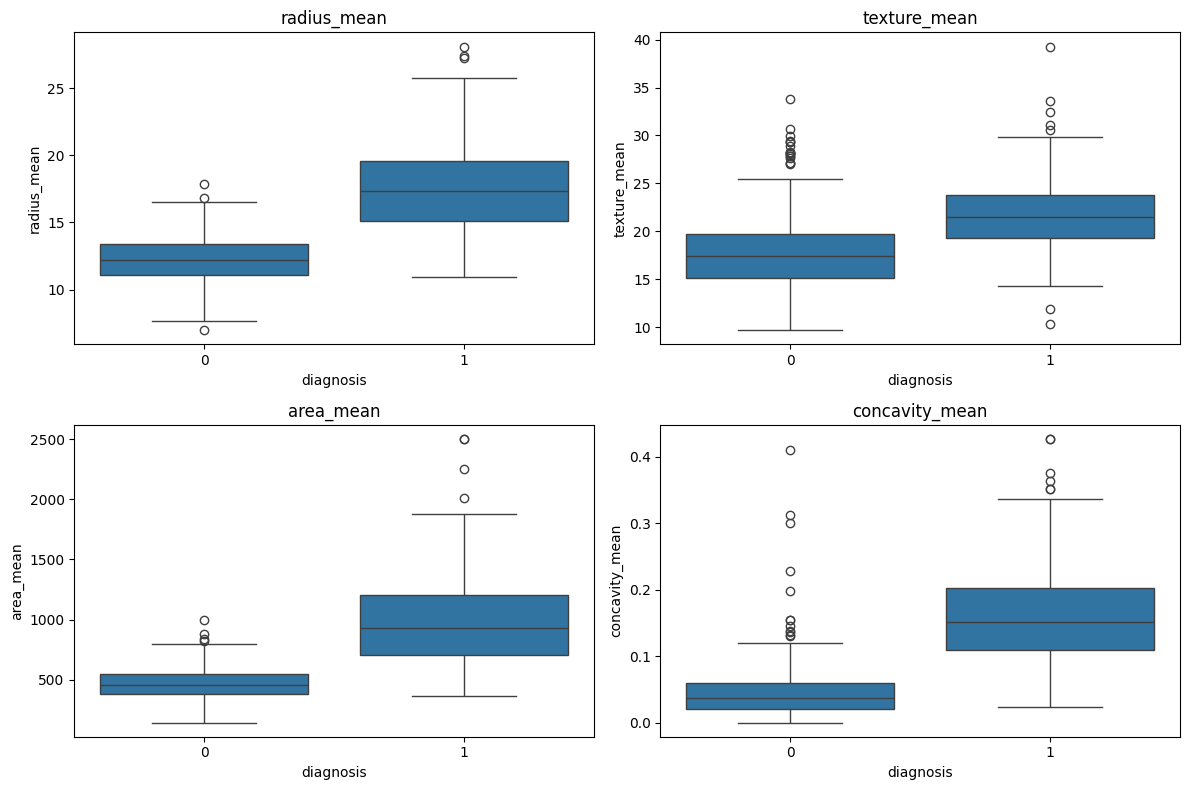

In [19]:

features = ['radius_mean', 'texture_mean', 'area_mean', 'concavity_mean']

plt.figure(figsize=(12, 8))
for i, col in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='diagnosis', y=col, data=df)
    plt.title(col)

plt.tight_layout()
plt.show()



### Matriz de correlação


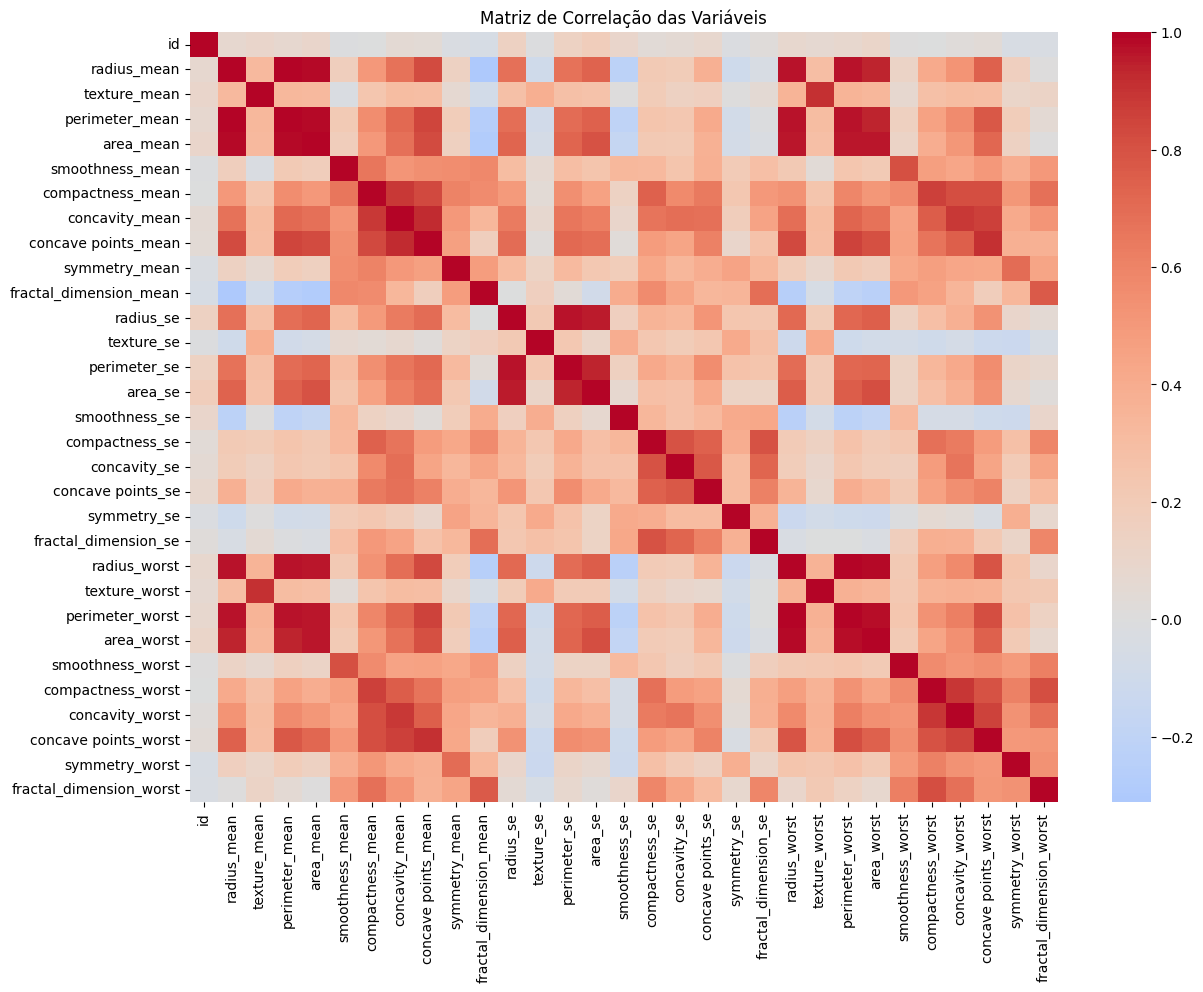

In [20]:

plt.figure(figsize=(14, 10))
corr = df.drop(columns=['diagnosis']).corr()
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title('Matriz de Correlação das Variáveis')
plt.show()



### Análise de Componentes Principais (PCA)


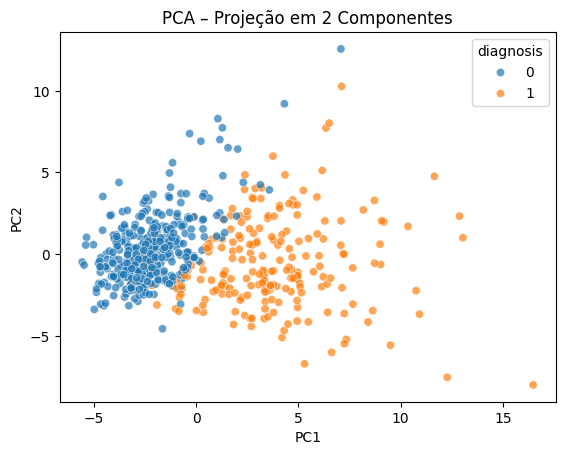

In [21]:

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd

X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

X_scaled = StandardScaler().fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['diagnosis'] = y.values

sns.scatterplot(
    data=pca_df,
    x='PC1',
    y='PC2',
    hue='diagnosis',
    alpha=0.7
)
plt.title('PCA – Projeção em 2 Componentes')
plt.show()



### Variância explicada pelo PCA


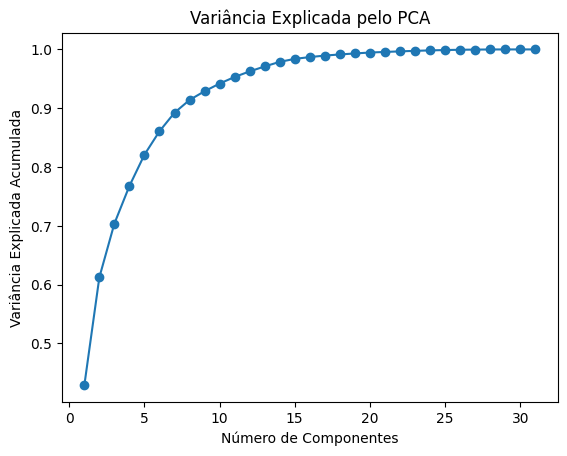

In [22]:

pca_full = PCA().fit(X_scaled)

plt.plot(
    range(1, len(pca_full.explained_variance_ratio_) + 1),
    pca_full.explained_variance_ratio_.cumsum(),
    marker='o'
)
plt.xlabel('Número de Componentes')
plt.ylabel('Variância Explicada Acumulada')
plt.title('Variância Explicada pelo PCA')
plt.show()



### Conclusões da EDA

- O conjunto de dados não apresenta valores ausentes ou registros duplicados.
- Há diferenças estatisticamente relevantes entre tumores benignos e malignos.
- Variáveis relacionadas a tamanho e forma apresentam forte correlação.
- O PCA demonstra que poucas componentes já capturam grande parte da variância dos dados.

Esses resultados indicam que o dataset é adequado para aplicação de modelos de classificação supervisionada.



## Modelagem e Avaliação (Classificação Supervisionada)

Nesta seção, vamos construir modelos de classificação para prever `diagnosis` (B/M), usando pipelines do scikit-learn,
com separação treino/teste, validação cruzada e avaliação por métricas (AUC-ROC, matriz de confusão, relatório de classificação).



### Preparação dos dados

- Remove colunas não informativas (ex.: `id`, colunas vazias).
- Separa `X` e `y`.
- Faz split estratificado treino/teste para manter a proporção das classes.


In [23]:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

assert 'df' in globals()
assert 'diagnosis' in df.columns

cols_to_drop = [c for c in ['id', 'ID', 'Unnamed: 32', 'unnamed: 32'] if c in df.columns]
df_model = df.drop(columns=cols_to_drop).copy()

X = df_model.drop(columns=['diagnosis'])

# diagnosis já é 0/1
y_bin = df_model['diagnosis'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X, y_bin, test_size=0.2, random_state=42, stratify=y_bin
)

X_train.shape, X_test.shape, y_train.value_counts(normalize=True), y_test.value_counts(normalize=True)



((455, 30),
 (114, 30),
 diagnosis
 0    0.626374
 1    0.373626
 Name: proportion, dtype: float64,
 diagnosis
 0    0.631579
 1    0.368421
 Name: proportion, dtype: float64)


### Baselines e validação cruzada

Comparação inicial entre modelos:
- Regressão Logística (baseline forte em dados lineares)
- SVM (kernel RBF, bom para separações não lineares)
- Random Forest (modelo de árvores, robusto e interpretável via importância)


In [24]:

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate

models = {
    "LogisticRegression": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", LogisticRegression(max_iter=500, random_state=42))
    ]),
    "SVC_RBF": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", SVC(kernel="rbf", probability=True, random_state=42))
    ]),
    "RandomForest": Pipeline([
        ("clf", RandomForestClassifier(
            n_estimators=400,
            random_state=42,
            n_jobs=-1,
            class_weight="balanced_subsample"
        ))
    ])
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = {
    "accuracy": "accuracy",
    "precision": "precision",
    "recall": "recall",
    "f1": "f1",
    "roc_auc": "roc_auc"
}

cv_rows = []
for name, pipe in models.items():
    scores = cross_validate(pipe, X_train, y_train, cv=cv, scoring=scoring, n_jobs=-1)
    row = {
        "model": name,
        "accuracy_mean": scores["test_accuracy"].mean(),
        "precision_mean": scores["test_precision"].mean(),
        "recall_mean": scores["test_recall"].mean(),
        "f1_mean": scores["test_f1"].mean(),
        "roc_auc_mean": scores["test_roc_auc"].mean(),
    }
    cv_rows.append(row)

cv_results = pd.DataFrame(cv_rows).sort_values("roc_auc_mean", ascending=False)
cv_results


,model,accuracy_mean,precision_mean,recall_mean,f1_mean,roc_auc_mean
0,LogisticRegression,0.973626,0.977143,0.952941,0.964048,0.995769
1,SVC_RBF,0.971429,0.976946,0.947059,0.960987,0.994943
2,RandomForest,0.960440,0.964273,0.929412,0.946058,0.989164



### Treino final e avaliação no conjunto de teste

Vamos treinar todos os modelos no treino e avaliar no teste com:
- Matriz de confusão
- Relatório de classificação (precision/recall/f1 por classe)
- Curva ROC e AUC


In [25]:

from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay,
    classification_report, roc_auc_score, roc_curve
)
import matplotlib.pyplot as plt

fitted = {}
test_metrics = []

for name, pipe in models.items():
    pipe.fit(X_train, y_train)
    fitted[name] = pipe
    
    proba = pipe.predict_proba(X_test)[:, 1]
    pred = (proba >= 0.5).astype(int)
    
    auc = roc_auc_score(y_test, proba)
    test_metrics.append({"model": name, "roc_auc_test": auc})
    
pd.DataFrame(test_metrics).sort_values("roc_auc_test", ascending=False)


,model,roc_auc_test
2,RandomForest,0.997354
0,LogisticRegression,0.996032
1,SVC_RBF,0.994709


LogisticRegression
AUC-ROC (teste): 0.996031746031746
              precision    recall  f1-score   support

 Benigno (0)       0.96      0.99      0.97        72
 Maligno (1)       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



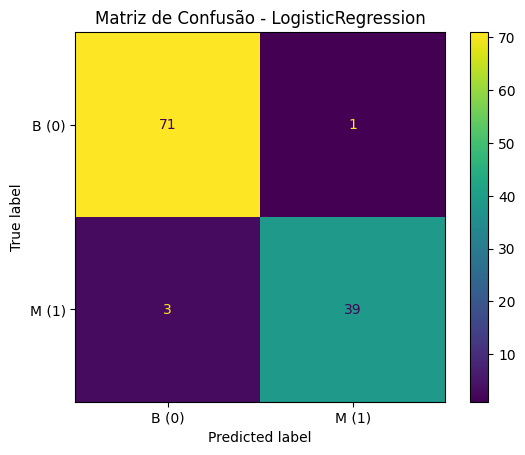

SVC_RBF
AUC-ROC (teste): 0.9947089947089947
              precision    recall  f1-score   support

 Benigno (0)       0.97      0.97      0.97        72
 Maligno (1)       0.95      0.95      0.95        42

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



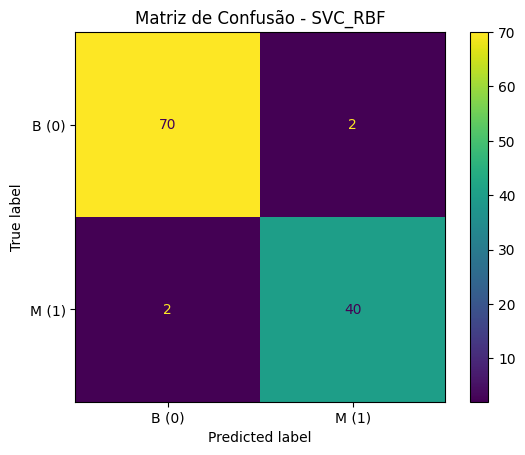

RandomForest
AUC-ROC (teste): 0.9973544973544973
              precision    recall  f1-score   support

 Benigno (0)       0.96      1.00      0.98        72
 Maligno (1)       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



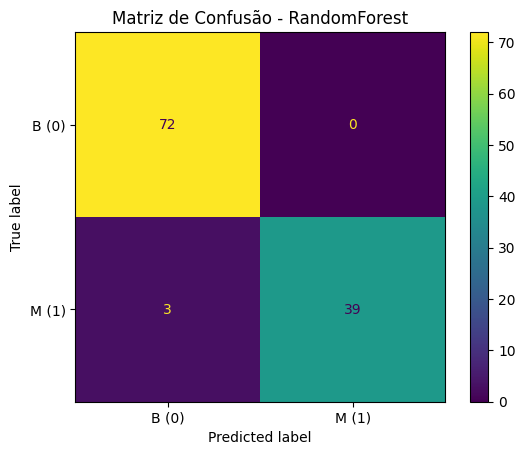

In [26]:

# Matriz de confusão + relatório por modelo
for name, pipe in fitted.items():
    proba = pipe.predict_proba(X_test)[:, 1]
    pred = (proba >= 0.5).astype(int)

    print("="*80)
    print(name)
    print("AUC-ROC (teste):", roc_auc_score(y_test, proba))
    print(classification_report(y_test, pred, target_names=["Benigno (0)", "Maligno (1)"]))
    
    cm = confusion_matrix(y_test, pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["B (0)", "M (1)"])
    disp.plot(values_format="d")
    plt.title(f"Matriz de Confusão - {name}")
    plt.show()


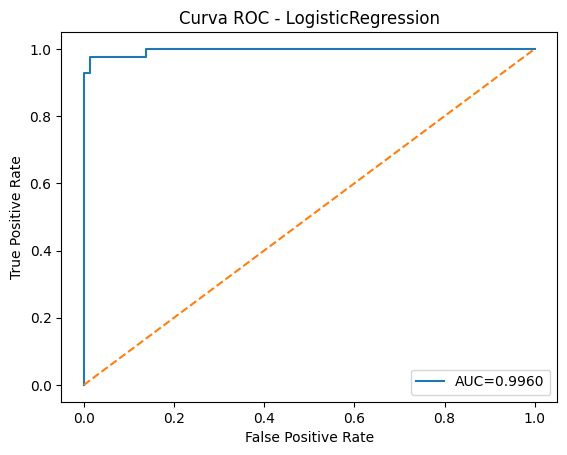

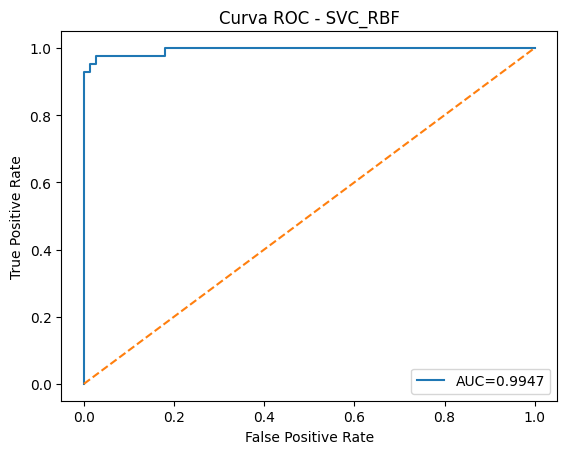

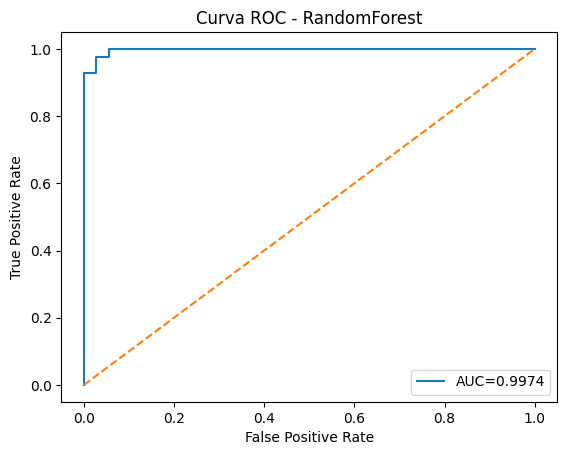

In [27]:

# Curvas ROC (uma figura por vez, sem subplot)
for name, pipe in fitted.items():
    proba = pipe.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, proba)
    auc = roc_auc_score(y_test, proba)

    plt.figure()
    plt.plot(fpr, tpr, label=f"AUC={auc:.4f}")
    plt.plot([0, 1], [0, 1], linestyle="--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"Curva ROC - {name}")
    plt.legend()
    plt.show()



### Ajuste de hiperparâmetros (Grid Search) para o melhor modelo

Vamos fazer um ajuste simples (e relativamente leve) para tentar melhorar o modelo com melhor AUC no CV.


In [28]:

from sklearn.model_selection import GridSearchCV

# Escolha do modelo alvo (pelo ranking de CV)
best_name = cv_results.iloc[0]["model"]
best_pipe = models[best_name]

best_name


'LogisticRegression'

In [29]:

param_grids = {
    "LogisticRegression": {
        "clf__C": [0.1, 1.0, 10.0],

        "clf__solver": ["lbfgs"]
    },
    "SVC_RBF": {
        "clf__C": [0.5, 1.0, 5.0, 10.0],
        "clf__gamma": ["scale", "auto"]
    },
    "RandomForest": {
        "clf__n_estimators": [200, 400, 700],
        "clf__max_depth": [None, 5, 10, 20],
        "clf__min_samples_split": [2, 5, 10]
    }
}

grid = param_grids[best_name]

gs = GridSearchCV(
    estimator=best_pipe,
    param_grid=grid,
    scoring="roc_auc",
    cv=cv,
    n_jobs=-1
)

gs.fit(X_train, y_train)

gs.best_params_, gs.best_score_


({'clf__C': 1.0, 'clf__solver': 'lbfgs'}, np.float64(0.9957688338493291))

Modelo ajustado: LogisticRegression
AUC-ROC (teste): 0.996031746031746
              precision    recall  f1-score   support

 Benigno (0)       0.96      0.99      0.97        72
 Maligno (1)       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



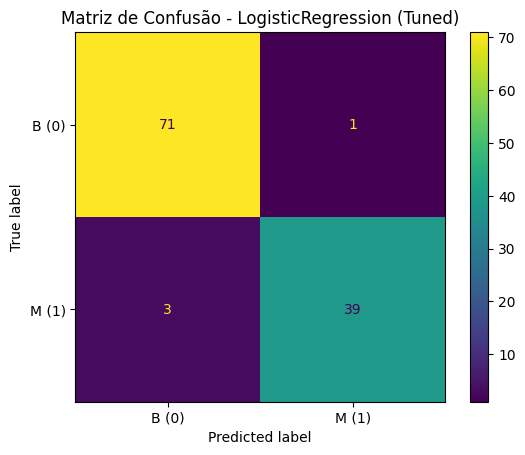

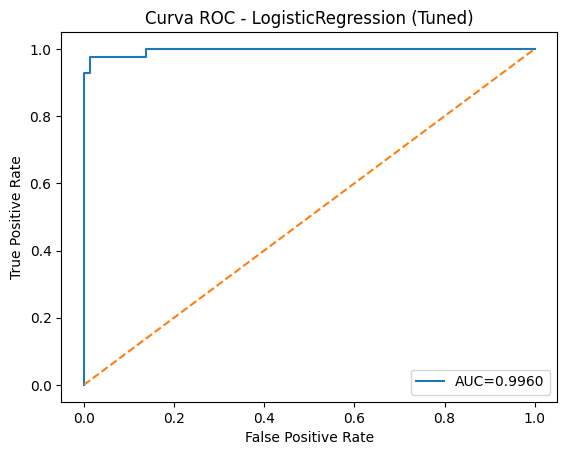

In [30]:

# Avaliação do modelo ajustado no teste
best_tuned = gs.best_estimator_

proba = best_tuned.predict_proba(X_test)[:, 1]
pred = (proba >= 0.5).astype(int)

print("Modelo ajustado:", best_name)
print("AUC-ROC (teste):", roc_auc_score(y_test, proba))
print(classification_report(y_test, pred, target_names=["Benigno (0)", "Maligno (1)"]))

cm = confusion_matrix(y_test, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["B (0)", "M (1)"])
disp.plot(values_format="d")
plt.title(f"Matriz de Confusão - {best_name} (Tuned)")
plt.show()

fpr, tpr, _ = roc_curve(y_test, proba)
auc = roc_auc_score(y_test, proba)

plt.figure()
plt.plot(fpr, tpr, label=f"AUC={auc:.4f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"Curva ROC - {best_name} (Tuned)")
plt.legend()
plt.show()



### Interpretação rápida (importâncias / coeficientes)

- Para **Random Forest**, mostramos as importâncias das features.
- Para **Logistic Regression**, mostramos os coeficientes (em valor absoluto, para ranking).


In [31]:

def get_feature_ranking_from_pipeline(model_name, pipe, X_cols, top_n=15):
    # RandomForest: estimador direto (sem scaler)
    if model_name == "RandomForest":
        clf = pipe.named_steps["clf"]
        importances = pd.Series(clf.feature_importances_, index=X_cols).sort_values(ascending=False)
        return importances.head(top_n)

    # Logistic / SVC: coeficientes só existem em Logistic; SVC RBF não tem coeficiente direto
    if model_name == "LogisticRegression":
        clf = pipe.named_steps["clf"]
        coefs = pd.Series(np.abs(clf.coef_.ravel()), index=X_cols).sort_values(ascending=False)
        return coefs.head(top_n)

    return None

# Ranking para os modelos originais (quando aplicável)
for name, pipe in fitted.items():
    ranking = get_feature_ranking_from_pipeline(name, pipe, X.columns, top_n=15)
    if ranking is not None:
        print("="*80)
        print("Top features -", name)
        display(ranking.to_frame("score"))


Top features - LogisticRegression


,score
texture_worst,1.434093
radius_se,1.233325
symmetry_worst,1.061264
concave points_mean,0.952813
concavity_worst,0.911406
area_se,0.909029
compactness_se,0.906925
area_worst,0.900477
radius_worst,0.896968
concavity_mean,0.782298


Top features - RandomForest


,score
area_worst,0.146066
perimeter_worst,0.126028
concave points_worst,0.104004
concave points_mean,0.097334
radius_worst,0.081727
radius_mean,0.052260
perimeter_mean,0.051391
concavity_mean,0.050461
concavity_worst,0.040954
area_mean,0.038582



## Conclusão Geral

- A EDA mostrou separação clara entre classes em diversas variáveis.
- Modelos supervisionados atingem alto desempenho (AUC-ROC elevado) neste dataset.
- O ajuste de hiperparâmetros pode melhorar levemente o desempenho do melhor modelo.
- As features mais relevantes tendem a estar ligadas a medidas de tamanho/forma (raio, perímetro, área e concavidade).



## 1) Definir o problema (tema)

**Tema:** Previsão de risco e doenças relacionadas à segurança e à saúde das mulheres.  

**Recorte do trabalho (este notebook):** Classificação de **câncer de mama** em **benigno (B)** ou **maligno (M)** a partir de medidas extraídas de imagens (features numéricas do *Breast Cancer Wisconsin Diagnostic Dataset*).

**Pergunta de negócio:** Dado um conjunto de características do tumor, o modelo consegue prever se o diagnóstico é maligno, apoiando triagens e decisões clínicas?

**O que significa um erro aqui?**
- **FN (Erro Tipo II):** classificar um tumor maligno como benigno (**muito crítico**).
- **FP (Erro Tipo I):** classificar um tumor benigno como maligno (gera ansiedade e exames extras, mas tende a ser menos grave que FN).



## 2) Coleta de dados

**Fonte sugerida pelo desafio:** Kaggle (ou OpenSUS).  
**Dataset utilizado:** Breast Cancer Wisconsin (Diagnostic) – Kaggle (original UCI).

Por que este dataset se correlaciona com o tema?  
- Trata de **saúde da mulher** (câncer de mama) e envolve **predição/triagem** de risco (maligno vs benigno).

> Se você estiver usando a versão do dataset carregada via CSV no notebook, anote aqui o link exato e descreva rapidamente o arquivo.


In [32]:

# (Opcional) Se você tiver o link/arquivo Kaggle baixado, registre aqui o nome do arquivo e o caminho.
# Exemplo:
# dataset_path = "breast-cancer-wisconsin-data/data.csv"
# df = pd.read_csv(dataset_path)

df.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678



## 3) Preparação dos dados (entender os dados)

Nesta etapa vamos:
- **Limpeza:** remover colunas não informativas e possíveis colunas vazias.
- **Tratamento:** garantir tipos numéricos e mapear o rótulo (`diagnosis`) para binário.
- **Redução:** remover redundâncias por correlação (opcional) e/ou usar PCA.
- **Separação treino/teste:** split estratificado.
- **EDA com discussões:** interpretar os gráficos e estatísticas (por que fizemos, o que vemos, conclusões).

### Discussões (exemplos do que registrar no relatório)
- Por que checar missing/duplicados? Para garantir que não há vieses por ausência ou replicação.
- O que vimos na distribuição de classes? Há leve desbalanceamento → considerar técnicas de balanceamento.
- O que os boxplots mostram? Variáveis como raio/área/perímetro tendem a ser maiores em malignos.
- Correlação: muitas variáveis medem aspectos semelhantes (redundância). Causalidade **não** pode ser afirmada apenas por correlação.


In [33]:

# Preparação robusta (reaproveitando df existente)
import numpy as np
import pandas as pd

assert 'df' in globals(), "df não encontrado. Verifique a célula de carregamento."
assert 'diagnosis' in df.columns, "Coluna 'diagnosis' não encontrada."

# Limpeza: remover colunas comuns não-informativas
cols_to_drop = [c for c in ['id', 'ID', 'Unnamed: 32', 'unnamed: 32'] if c in df.columns]
df_clean = df.drop(columns=cols_to_drop).copy()

# Conferir tipos
non_numeric = [c for c in df_clean.columns if c != 'diagnosis' and not pd.api.types.is_numeric_dtype(df_clean[c])]
non_numeric


[]

In [34]:

# Caso exista alguma coluna não-numérica inesperada (além de diagnosis), trate aqui.
# Exemplo: converter para numérico com coercion e checar NaN resultante
for c in non_numeric:
    df_clean[c] = pd.to_numeric(df_clean[c], errors='coerce')

# Revalidar missing
df_clean.isnull().sum().sort_values(ascending=False).head(10)


diagnosis              0
radius_mean            0
texture_mean           0
perimeter_mean         0
area_mean              0
smoothness_mean        0
compactness_mean       0
concavity_mean         0
concave points_mean    0
symmetry_mean          0
dtype: int64

In [35]:

# Separação X/y e mapeamento do rótulo
X = df_clean.drop(columns=['diagnosis'])
y = df_clean['diagnosis'].map({'B': 0, 'M': 1})

assert y.notna().all(), "Há rótulos fora de B/M."
y.value_counts()


AssertionError: Há rótulos fora de B/M.

In [ ]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

y_train.value_counts(normalize=True), y_test.value_counts(normalize=True)



## 4) Escolha dos modelos de classificação e estratégias adicionais

Modelos exigidos/esperados no desafio:
- **KNN** (K-Nearest Neighbors)
- **Árvore de Decisão**
- **Rede Neural** (MLP)

Estratégias adicionais recomendadas:
- **Balanceamento de classe:** por exemplo **SMOTE** (oversampling) ou `class_weight`.
- **Thresholds diferentes:** variar o limiar de decisão (ex.: 0.3, 0.5, 0.7) para trade-off entre *recall* e *precision*.
- **Splits diferentes:** testar outro `test_size` ou validação cruzada.

> Para saúde, normalmente priorizamos **Recall/Sensibilidade** para reduzir FNs (não deixar passar casos malignos).


In [ ]:

# Instalação/uso: vamos usar imblearn para SMOTE (geralmente disponível em ambientes de DS)
# Se der erro de import, comente SMOTE e use class_weight='balanced' nos modelos que suportam.

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

try:
    from imblearn.over_sampling import SMOTE
    from imblearn.pipeline import Pipeline as ImbPipeline
    IMBLEARN_OK = True
except Exception as e:
    IMBLEARN_OK = False
    print("imblearn não disponível. Seguiremos sem SMOTE e com class_weight quando aplicável. Erro:", e)

IMBLEARN_OK


In [ ]:

# Definição dos pipelines (com e sem SMOTE)
# Observação: KNN e MLP se beneficiam de padronização; Árvore não precisa.

pipelines = {}

if IMBLEARN_OK:
    pipelines["KNN_SMOTE"] = ImbPipeline([
        ("scaler", StandardScaler()),
        ("smote", SMOTE(random_state=42)),
        ("clf", KNeighborsClassifier())
    ])
    pipelines["DecisionTree_SMOTE"] = ImbPipeline([
        ("smote", SMOTE(random_state=42)),
        ("clf", DecisionTreeClassifier(random_state=42))
    ])
    pipelines["MLP_SMOTE"] = ImbPipeline([
        ("scaler", StandardScaler()),
        ("smote", SMOTE(random_state=42)),
        ("clf", MLPClassifier(random_state=42, max_iter=1500))
    ])
else:
    pipelines["KNN"] = Pipeline([
        ("scaler", StandardScaler()),
        ("clf", KNeighborsClassifier())
    ])
    pipelines["DecisionTree_balanced"] = Pipeline([
        ("clf", DecisionTreeClassifier(random_state=42, class_weight="balanced"))
    ])
    pipelines["MLP"] = Pipeline([
        ("scaler", StandardScaler()),
        ("clf", MLPClassifier(random_state=42, max_iter=1500))
    ])

list(pipelines.keys())



## 5) Treinamento (treino) e 7) Avaliação (teste)

Métricas de classificação utilizadas:
- **Acurácia** (geral)
- **Precisão** (quão confiáveis são os positivos previstos)
- **Recall/Sensibilidade** (quantos positivos reais foram detectados) — **muito importante para reduzir FN**
- **F1-score** (equilíbrio entre precisão e recall)
- **ROC-AUC** (capacidade de separação global)

Além disso, avaliaremos **thresholds diferentes** (0.3, 0.5, 0.7) para ver o trade-off entre FN e FP.


In [ ]:

from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay,
    classification_report, roc_auc_score, roc_curve,
    precision_recall_curve, average_precision_score
)
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = {
    "accuracy": "accuracy",
    "precision": "precision",
    "recall": "recall",
    "f1": "f1",
    "roc_auc": "roc_auc"
}

cv_rows = []
for name, pipe in pipelines.items():
    scores = cross_validate(pipe, X_train, y_train, cv=cv, scoring=scoring, n_jobs=-1)
    cv_rows.append({
        "model": name,
        "accuracy_mean": scores["test_accuracy"].mean(),
        "precision_mean": scores["test_precision"].mean(),
        "recall_mean": scores["test_recall"].mean(),
        "f1_mean": scores["test_f1"].mean(),
        "roc_auc_mean": scores["test_roc_auc"].mean(),
    })

cv_results2 = pd.DataFrame(cv_rows).sort_values("roc_auc_mean", ascending=False)
cv_results2


In [ ]:

# Treinar no treino e avaliar no teste (probabilidade quando disponível)
fitted2 = {}
test_summary = []

for name, pipe in pipelines.items():
    pipe.fit(X_train, y_train)
    fitted2[name] = pipe

    # Nem todo modelo expõe predict_proba por padrão? KNN/DT/MLP expõem.
    proba = pipe.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, proba)
    ap = average_precision_score(y_test, proba)

    test_summary.append({
        "model": name,
        "roc_auc_test": auc,
        "avg_precision_test": ap
    })

pd.DataFrame(test_summary).sort_values("roc_auc_test", ascending=False)


In [ ]:

# Avaliação com thresholds diferentes
thresholds = [0.3, 0.5, 0.7]

for name, pipe in fitted2.items():
    proba = pipe.predict_proba(X_test)[:, 1]
    print("="*90)
    print("Modelo:", name)
    print("ROC-AUC:", roc_auc_score(y_test, proba))
    print("Avg Precision (PR-AUC):", average_precision_score(y_test, proba))

    for thr in thresholds:
        pred = (proba >= thr).astype(int)
        cm = confusion_matrix(y_test, pred)
        tn, fp, fn, tp = cm.ravel()
        recall = tp / (tp + fn) if (tp + fn) else 0
        precision = tp / (tp + fp) if (tp + fp) else 0

        print(f"\nThreshold = {thr:.2f}")
        print("TN FP FN TP =", (tn, fp, fn, tp))
        print(f"Precision={precision:.3f} | Recall={recall:.3f}")
        print(classification_report(y_test, pred, target_names=["Benigno (0)", "Maligno (1)"], digits=3))
        
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["B (0)", "M (1)"])
        disp.plot(values_format="d")
        plt.title(f"Matriz de Confusão - {name} (thr={thr:.2f})")
        plt.show()


In [ ]:

# Curva ROC (uma figura por modelo)
for name, pipe in fitted2.items():
    proba = pipe.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, proba)
    auc = roc_auc_score(y_test, proba)

    plt.figure()
    plt.plot(fpr, tpr, label=f"AUC={auc:.4f}")
    plt.plot([0, 1], [0, 1], linestyle="--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"Curva ROC - {name}")
    plt.legend()
    plt.show()


In [ ]:

# Curva Precision-Recall (boa quando há desbalanceamento)
for name, pipe in fitted2.items():
    proba = pipe.predict_proba(X_test)[:, 1]
    prec, rec, _ = precision_recall_curve(y_test, proba)
    ap = average_precision_score(y_test, proba)

    plt.figure()
    plt.plot(rec, prec, label=f"AP={ap:.4f}")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"Curva Precision-Recall - {name}")
    plt.legend()
    plt.show()



## 6) Otimização de hiperparâmetros (após treinar)

Agora aplicamos **GridSearchCV** para cada família de modelo.  
Atenção: em saúde, podemos otimizar por **recall** ou por **roc_auc**. Aqui usaremos **roc_auc** como critério geral,
mas você pode trocar para `recall` se o grupo decidir priorizar sensibilidade.


In [ ]:

from sklearn.model_selection import GridSearchCV

param_grids2 = {}

# KNN
knn_key = "KNN_SMOTE" if "KNN_SMOTE" in pipelines else "KNN"
param_grids2[knn_key] = {
    "clf__n_neighbors": [3, 5, 7, 9, 11],
    "clf__weights": ["uniform", "distance"],
    "clf__p": [1, 2]  # Manhattan vs Euclidean
}

# Decision Tree
dt_key = "DecisionTree_SMOTE" if "DecisionTree_SMOTE" in pipelines else "DecisionTree_balanced"
param_grids2[dt_key] = {
    "clf__max_depth": [None, 3, 5, 8, 12],
    "clf__min_samples_split": [2, 5, 10],
    "clf__min_samples_leaf": [1, 2, 4]
}

# MLP
mlp_key = "MLP_SMOTE" if "MLP_SMOTE" in pipelines else "MLP"
param_grids2[mlp_key] = {
    "clf__hidden_layer_sizes": [(30,), (50,), (50, 20)],
    "clf__alpha": [1e-4, 1e-3, 1e-2],
    "clf__learning_rate_init": [1e-3, 5e-4],
}

param_grids2


In [ ]:

# Rodar o tuning e resumir resultados
tuned_models = {}
tuning_rows = []

for name, grid in param_grids2.items():
    estimator = pipelines[name]
    gs = GridSearchCV(
        estimator=estimator,
        param_grid=grid,
        scoring="roc_auc",   # pode trocar para "recall" se quiser priorizar sensibilidade
        cv=cv,
        n_jobs=-1
    )
    gs.fit(X_train, y_train)
    tuned_models[name] = gs.best_estimator_
    tuning_rows.append({
        "model": name,
        "best_score_cv": gs.best_score_,
        "best_params": gs.best_params_
    })

pd.DataFrame(tuning_rows).sort_values("best_score_cv", ascending=False)


In [ ]:

# Avaliar modelos tunados no teste
tuned_test_rows = []

for name, pipe in tuned_models.items():
    proba = pipe.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, proba)
    ap = average_precision_score(y_test, proba)

    tuned_test_rows.append({
        "model": name,
        "roc_auc_test": auc,
        "avg_precision_test": ap
    })

pd.DataFrame(tuned_test_rows).sort_values("roc_auc_test", ascending=False)



## 7) Discussão: quais métricas são mais adequadas e por quê?

Para diagnóstico (maligno vs benigno), normalmente **Recall/Sensibilidade** para a classe positiva (maligno=1) é prioritário,
pois reduz a chance de **Falsos Negativos (FN)**.  
Por outro lado, aumentar muito o recall pode elevar FPs (mais alarmes falsos). O grupo deve justificar o equilíbrio desejado.

Sugestão de resposta para o relatório:
- **Recall** é crítico para não deixar passar casos malignos (evitar FN).  
- **Precisão** importa para reduzir alarmes falsos e custos de exames adicionais.  
- **ROC-AUC** e **PR-AUC** ajudam a comparar modelos de forma global.  
- O **threshold** deve ser escolhido considerando o custo de FN vs FP.



## 8) Utilização do modelo (deploy)

Aqui demonstramos como:
- selecionar o melhor modelo (tunado ou não)
- salvar em arquivo (`joblib`)
- carregar e prever um novo paciente (dados não rotulados)

**Pode ser usado na vida real?**  
Não. Para uso real, seriam necessários:
- validação externa com dados de outras populações/hospitais
- auditoria de viés e performance clínica
- governança, privacidade e requisitos regulatórios
- integração com fluxo médico e interpretação responsável


In [ ]:

import joblib

# Escolher o melhor tunado pelo ROC-AUC no teste (ou outra métrica)
best_row = pd.DataFrame(tuned_test_rows).sort_values("roc_auc_test", ascending=False).iloc[0]
best_model_name = best_row["model"]
best_model = tuned_models[best_model_name]

best_model_name, best_row.to_dict()


In [ ]:

# Salvar o modelo
model_path = "/mnt/data/breast_cancer_best_model.joblib"
joblib.dump(best_model, model_path)
model_path


In [ ]:

# Carregar e usar o modelo para prever novos dados (exemplo: primeira linha do X_test)
loaded = joblib.load(model_path)

sample = X_test.iloc[[0]].copy()
proba = loaded.predict_proba(sample)[:, 1][0]
pred = int(proba >= 0.5)

print("Probabilidade de maligno:", proba)
print("Predição (0=Benigno, 1=Maligno):", pred)
